<h2 align="center" style="color:Green ;">SMS Spam Classification Using Naive Bayes</h2>



### Dataset Credits
This dataset is taken from UCI Machine Learning Respository: https://archive.ics.uci.edu/dataset/228/sms+spam+collection



### **Project Objective**
To develop a machine learning model capable of accurately distinguishing between spam and ham (non-spam) SMS messages.

To analyze SMS text data through exploratory data analysis (EDA) and word frequency visualization to understand common patterns in spam messages.

To implement and evaluate classification algorithms (e.g., Naive Bayes, SVM, or Logistic Regression) using metrics like accuracy, precision, recall, and F1-score.

To build a reliable, high-performance classifier that can support real-time filtering of unwanted or malicious SMS messages.

To contribute toward automated messaging systems that improve communication safety and reduce spam.

### Data Load and EDA

In [1]:
import pandas as pd

df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

### Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category, test_size=0.2, random_state=5)

In [4]:
X_train

1658    S:-)if we have one good partnership going we w...
1509    Sounds like something that someone testing me ...
3266    44 7732584351, Do you want a New Nokia 3510i c...
5199           Ugh my leg hurts. Musta overdid it on mon.
3217    URGENT! We are trying to contact U. Todays dra...
                              ...                        
3046    Hello, yeah i've just got out of the bath and ...
1725              There bold 2  &lt;#&gt; . Is that yours
4079                  Gam gone after outstanding innings.
2254                         Lol enjoy role playing much?
2915    Sorry! U can not unsubscribe yet. THE MOB offe...
Name: Message, Length: 4457, dtype: object

### Feature Engineering: Convert Text into Vector

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 7705))

### Word Frequency Visualization

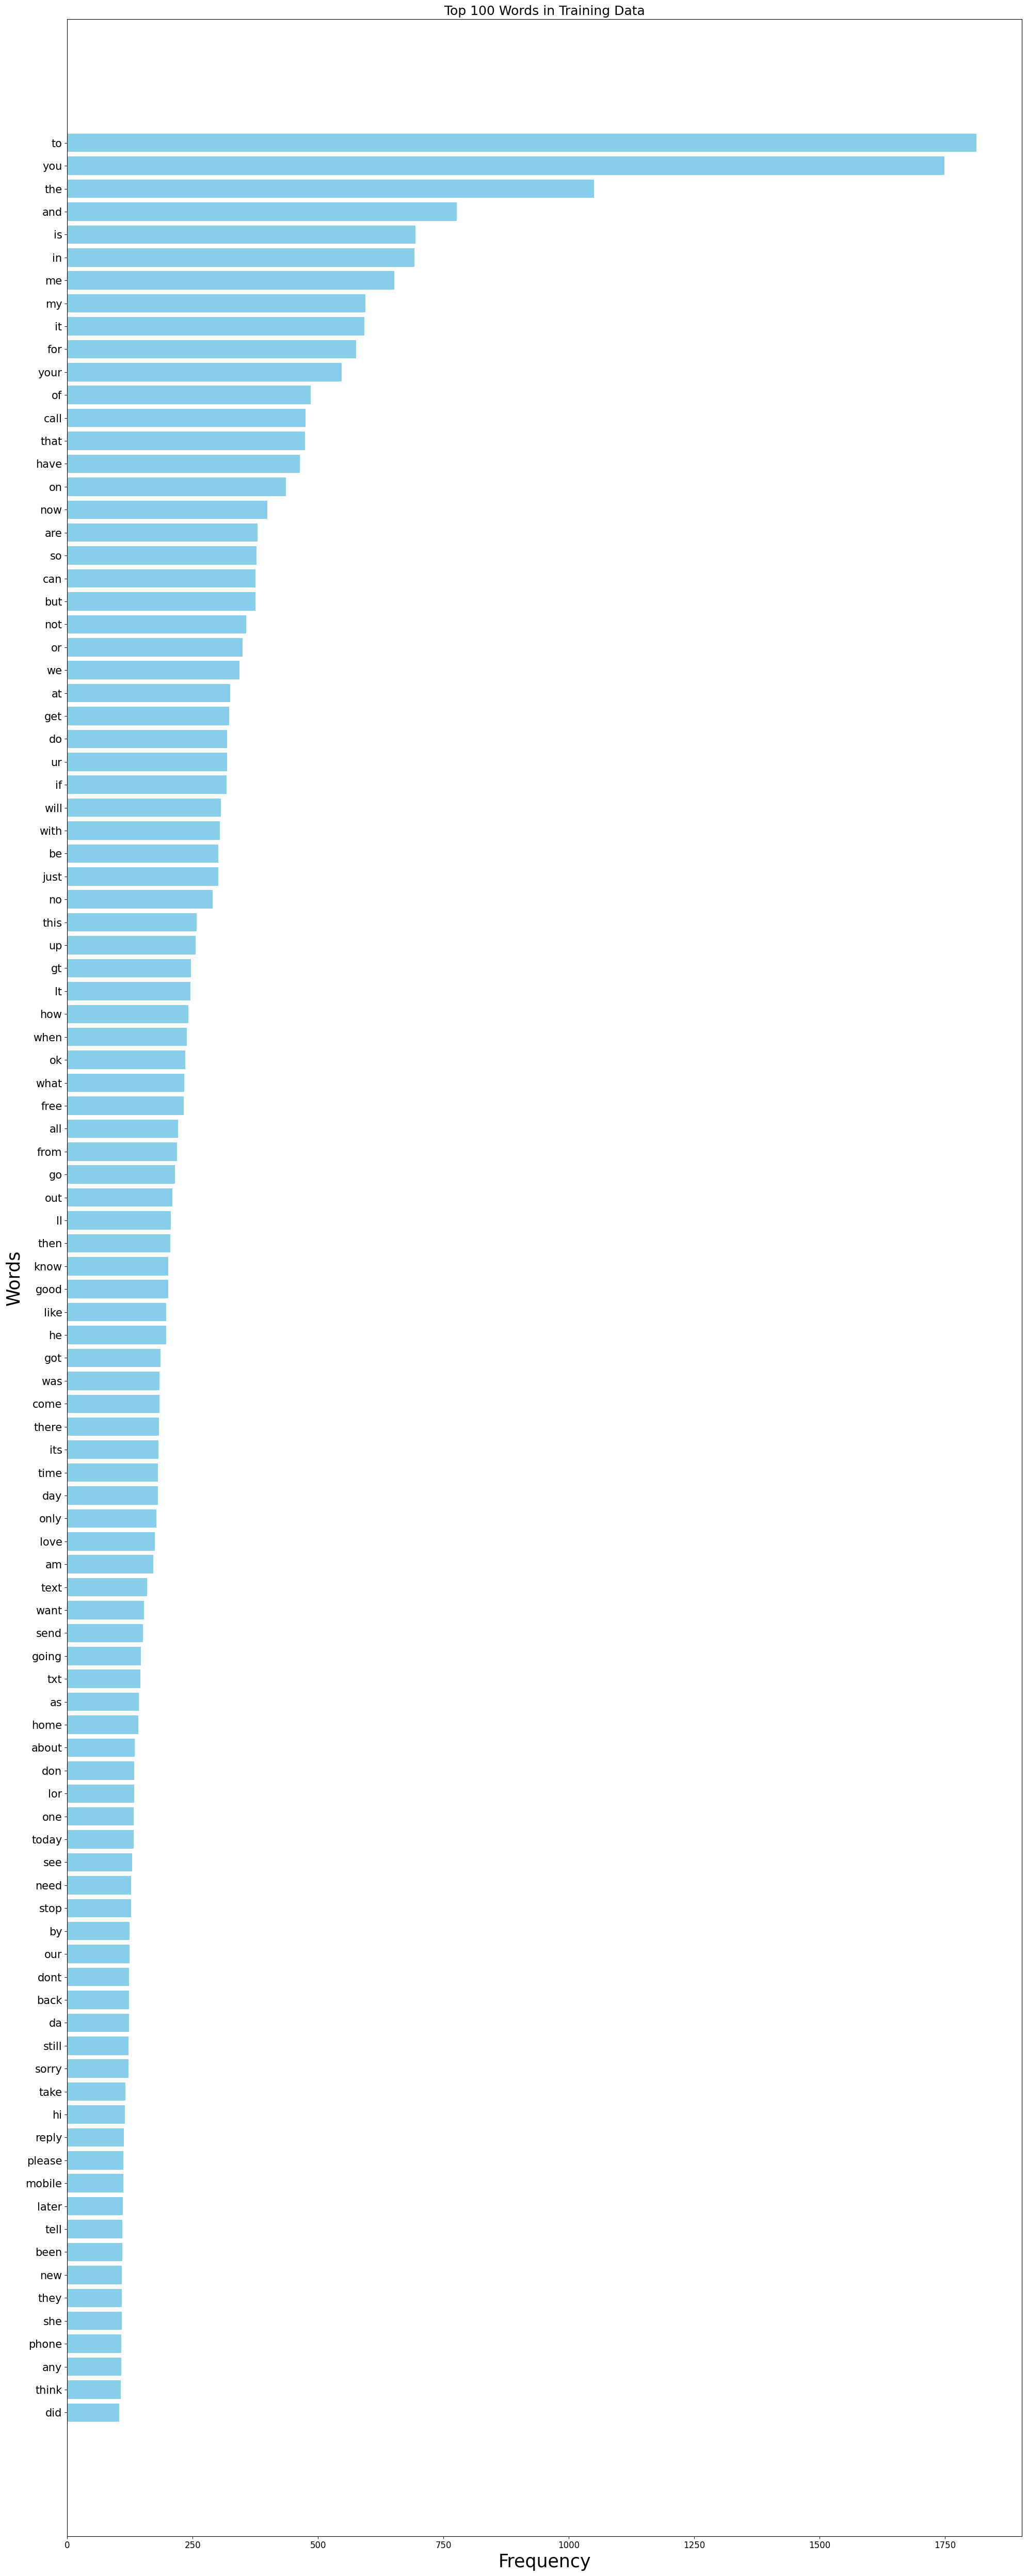

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Get total word frequencies
word_counts = np.asarray(X_train_count.sum(axis=0)).flatten()
words = v.get_feature_names_out()

# Get top N words
top_n = 100
top_indices = word_counts.argsort()[::-1][:top_n]
top_words = [words[i] for i in top_indices]
top_freqs = word_counts[top_indices]


plt.figure(figsize=(20, 50))
plt.barh(top_words[::-1], top_freqs[::-1], color='skyblue')
plt.xlabel("Frequency", fontsize=25)
plt.ylabel("Words", fontsize=25)
plt.title(f"Top {top_n} Words in Training Data", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()



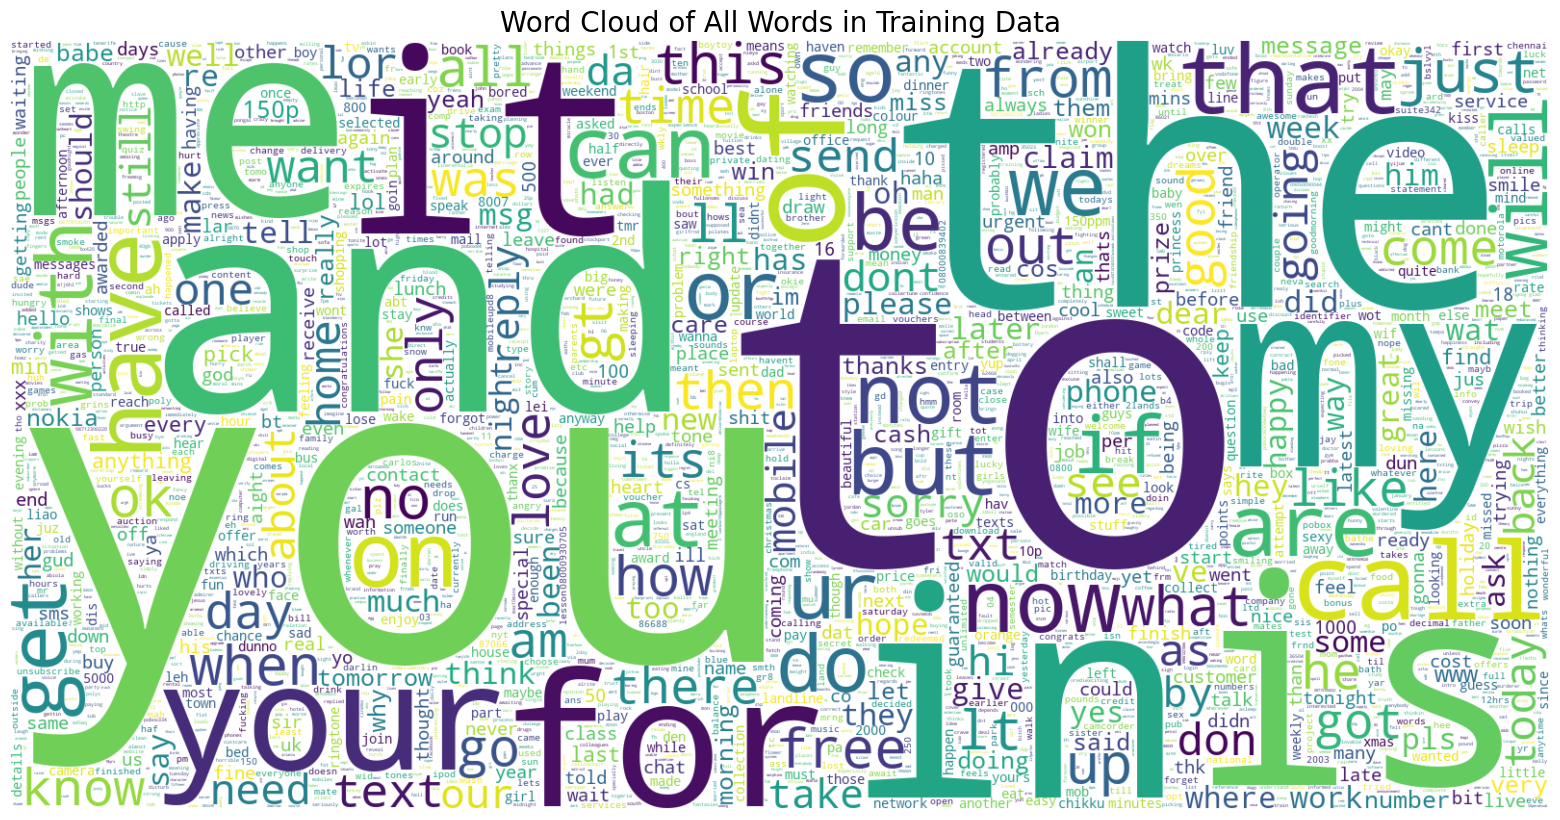

In [8]:

from wordcloud import WordCloud

# Get all word frequencies
word_counts = np.asarray(X_train_count.sum(axis=0)).flatten()
words = v.get_feature_names_out()
word_freq = {words[i]: word_counts[i] for i in range(len(words))}

# Create word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white',
                      max_words=7705, colormap='viridis').generate_from_frequencies(word_freq)

# Show word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Words in Training Data", fontsize=20)
plt.show()


In [9]:



# Get all word frequencies
word_counts = np.asarray(X_train_count.sum(axis=0)).flatten()
words = v.get_feature_names_out()

# Create DataFrame
word_freq_df = pd.DataFrame({
    'Word': words,
    'Frequency': word_counts
})

# Sort by frequency (descending)
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 as a sample
print(word_freq_df.head(11))


    Word  Frequency
0     to       1813
1    you       1749
2    the       1051
3    and        777
4     is        694
5     in        692
6     me        652
7     my        595
8     it        593
9    for        576
10  your        547


In [10]:
from IPython.display import display
display(word_freq_df)


,Word,Frequency
0,to,1813
1,you,1749
2,the,1051
3,and,777
4,is,694
...,...,...
7700,08704439680,1
7701,08704439680ts,1
7702,yhl,1
7703,yifeng,1


In [11]:
word_freq_df.to_csv('word_frequencies.csv', index=False)


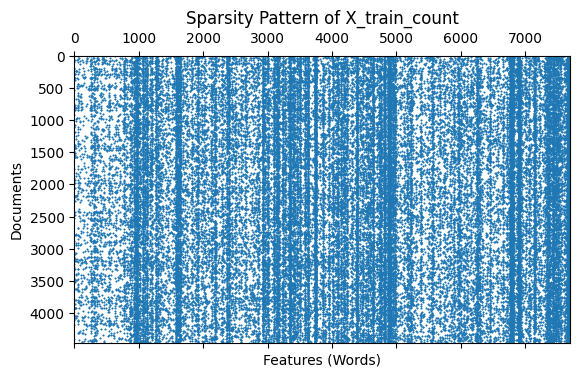

In [12]:
import matplotlib.pyplot as plt
plt.spy(X_train_count, markersize=0.5)
plt.title("Sparsity Pattern of X_train_count")
plt.xlabel("Features (Words)")
plt.ylabel("Documents")
plt.show()


In [13]:
len(X_train_count.toarray()[2])

7705

### Train a Model Using Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

### Model Evaluation: Precision, Recall and F1-Score

In [15]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### Model Evaluation: Confusion Matrix

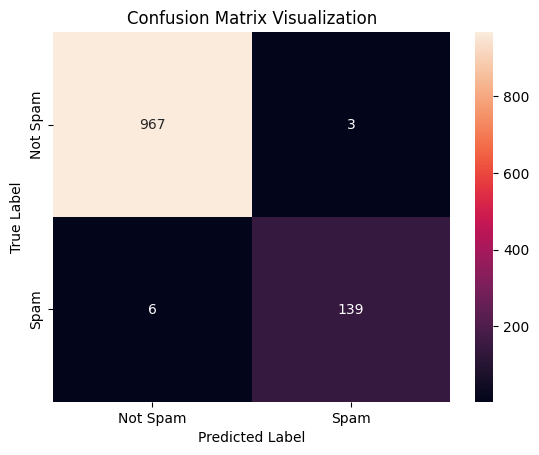

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

### Prediction on Sample Emails

In [17]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

### Now do same thing using Sklearn Pipeline with Few Lines of Code

In [18]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [19]:
pipe.predict(emails)

array(['ham', 'spam'], dtype='<U4')

### **Model Performance Summary**

1. The machine learning model demonstrates excellent performance in classifying SMS messages.

2. Achieved a high overall accuracy of 99%, correctly identifying 1,115 out of 1,127 messages.

3. Ham messages (non-spam) were classified with:

4. 99% precision and 100% recall → No ham messages were misclassified.

5. Spam messages were classified with:

6. 98% precision and 96% recall → A small number of spam messages were missed.

7. F1-score of 0.97 for spam shows strong balance between precision and recall.

8. The model is slightly more confident in identifying ham, but still performs strongly in spam detection.

9. Macro and weighted averages indicate consistently high performance across both classes.

These metrics confirm the model's reliability for real-world SMS spam detection tasks.